In [1]:
import os
import pandas as pd
import librosa
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import soundfile as sf
import itertools

# Load the data

In [2]:
PATH_TO_FILES = '.'
files_list = ['PPB_2019_Aug_27_2_of_2.txt', 'PPB_2020_Jan_25.txt', 'PPB_2019_Nov_20.txt', 'PPB_2019_Aug_04.txt', 'PPB_2018_Oct_25.txt', 'PPB_2020_Jan_27_2_of_2.txt', 'PPB_2019_Oct_21.txt', 'PPB_2020_Jan_27_1_of_2.txt', 'PPB_2019_Aug_27_1_of_2.txt']
print(f'total number of annotation files: {len(files_list)}')

total number of annotation files: 9


In [3]:
## read every tags file into a dataframe and concatenate them all into "all_data" df

all_data = pd.DataFrame()
for file in files_list:
    tmp_file = pd.read_csv(os.path.join(PATH_TO_FILES, file), sep="\t", on_bad_lines='skip')
    tmp_file['annotation_source'] = file.replace('.txt', '')
    print(f'length: {len(tmp_file)} for file: {file}')
    all_data = all_data.append(tmp_file, ignore_index=True)
print('\n',all_data.count())
all_data.head()

length: 83 for file: PPB_2019_Aug_27_2_of_2.txt
length: 18 for file: PPB_2020_Jan_25.txt
length: 417 for file: PPB_2019_Nov_20.txt
length: 33 for file: PPB_2019_Aug_04.txt
length: 50 for file: PPB_2018_Oct_25.txt
length: 93 for file: PPB_2020_Jan_27_2_of_2.txt
length: 90 for file: PPB_2019_Oct_21.txt
length: 78 for file: PPB_2020_Jan_27_1_of_2.txt
length: 106 for file: PPB_2019_Aug_27_1_of_2.txt

 Selection                  968
View                       968
Channel                    968
Begin Time (s)             968
End Time (s)               968
Peak Freq Contour (Hz)     968
Begin Path                 968
End File                   968
File Offset (s)            968
Beg File Samp (samples)    968
Low Freq (Hz)              968
High Freq (Hz)             968
Peak Freq (Hz)             968
BW 50% (Hz)                875
Type                       942
Class                      890
Overtones                  549
Steps                      536
Notes                      124
annotation

,Selection,View,Channel,Begin Time (s),End Time (s),Peak Freq Contour (Hz),Begin Path,End File,File Offset (s),Beg File Samp (samples),Low Freq (Hz),High Freq (Hz),Peak Freq (Hz),BW 50% (Hz),Type,Class,Overtones,Steps,Notes,annotation_source
0,1,Spectrogram 1,1,31.124609,32.013422,3187.500;3187.500;3187.500;3187.500;3750.000;3...,D:\HYDRO_PPB_RAW\PPB_2019_Hydrophone_RAW\PPB_S...,PPB27082019_ZOOM0230.WAV,31.1246,2987962,2802.920,12963.504,7875.0,4687.5,BW,BS,0.0,0.0,very faint,PPB_2019_Aug_27_2_of_2
1,2,Spectrogram 1,1,33.030652,34.995130,0.000;0.000;187.500;375.000;187.500;0.000;0.00...,D:\HYDRO_PPB_RAW\PPB_2019_Hydrophone_RAW\PPB_S...,PPB27082019_ZOOM0230.WAV,33.0307,3170943,0.000,1284.672,375.0,375.0,BARKS,NaN,NaN,NaN,NaN,PPB_2019_Aug_27_2_of_2
2,3,Spectrogram 1,1,33.290829,33.337618,562.500;562.500;562.500;562.500;375.000;375.00...,D:\HYDRO_PPB_RAW\PPB_2019_Hydrophone_RAW\PPB_S...,PPB27082019_ZOOM0230.WAV,33.2908,3195920,259.754,2568.674,375.0,187.5,P,Pa,NaN,NaN,NaN,PPB_2019_Aug_27_2_of_2
3,4,Spectrogram 1,1,33.551025,33.589826,562.500;562.500;562.500;562.500;562.500;562.50...,D:\HYDRO_PPB_RAW\PPB_2019_Hydrophone_RAW\PPB_S...,PPB27082019_ZOOM0230.WAV,33.5510,3220898,288.615,3001.596,375.0,187.5,P,Pa,NaN,NaN,NaN,PPB_2019_Aug_27_2_of_2
4,5,Spectrogram 1,1,33.806656,33.839752,562.500;562.500;562.500;562.500;375.000;375.00...,D:\HYDRO_PPB_RAW\PPB_2019_Hydrophone_RAW\PPB_S...,PPB27082019_ZOOM0230.WAV,33.8067,3245439,230.892,2886.150,375.0,187.5,P,Pa,NaN,NaN,NaN,PPB_2019_Aug_27_2_of_2


In [4]:
# single = pd.read_csv(os.path.join(PATH_TO_FILES, 'PPB_2019_Aug_27_1_of_2.txt'), sep="\t", on_bad_lines='skip')
# single.iloc[3:30]

In [5]:
# Add length
all_data['length'] = all_data['End Time (s)'] - all_data['Begin Time (s)']

In [6]:
# keep only the most important fields and change the names to match the desired notation
most_important_fields = {'Begin Time (s)': 'begin_time',
                         'End Time (s)': 'end_time',
                         'End File': 'filename',
                         'length': 'length',
                         'Low Freq (Hz)': 'low_freq',
                         'High Freq (Hz)': 'high_freq',
                         'Peak Freq (Hz)': 'peak_freq',
                         'Class': 'class',
                         'Type': 'type',
                         'annotation_source': 'annotation_source',
                        }
df = all_data[most_important_fields.keys()]
df.columns = list(most_important_fields.values())
df.count()

begin_time           968
end_time             968
filename             968
length               968
low_freq             968
high_freq            968
peak_freq            968
class                890
type                 942
annotation_source    968
dtype: int64

In [7]:
# drop if any of the important columns fields with nan. Note: there are places where the string "NAN" is present, but it is not a not-a-number object, so it is not filtered
df = df.reset_index(drop=True)
df.count()

begin_time           968
end_time             968
filename             968
length               968
low_freq             968
high_freq            968
peak_freq            968
class                890
type                 942
annotation_source    968
dtype: int64

## Types collection
According to Amber, here is char to type/ class mappers:

### Vocalisation Type:
Call: code
- Whistle: BW and W
- Burst-pulse sound: BBP and P
- Click: BCL and E

### Vocalisation Class:
Call typeRaven code
- Constant (whistle) BC and WCs
- Upsweep (whistle)  BUp and WUp
- Downsweep (whistle) BDn and WDn
- Convex (whistle) BCx and WCx
- Concave (whistle) BCa and WCa
- Sine (whistle) BS and WSn
- Bark (burst-pulse sound) Bba and Pa
- Feeding buzz (burst-pulse sound) BFb and Pf
- Buzz (burst-pulse sound) Pz
- Creaky door (burst-pulse sound) Pc
- Squeak (burst-pulse sound) Ps
- Clicks  BCL and E

In [8]:
available_types_before_cleaning = df['type'].unique()
print(f'available_types before cleaning: {available_types_before_cleaning}')
available_classes_before_cleaning = df['class'].unique()
print(f'available_classes before cleaning: {available_classes_before_cleaning}')


classes_mapper_cleaning = {
    'pa': 'Pa',
    'PA': 'Pa',
    'BBa': 'Bba',
    'Bpz': 'Pz',
}

types_mapper_cleaning = {
    'barks': 'BARKS',
    'DEEP BARKS?': 'BARKS',
}

type_mapper_merger = {
    'BW': 'whistle',
    'W': 'whistle',
    'BBP': 'B-P',
    'P': 'B-P',
    'BARKS': 'B-P',
}

classes_mapper_to_types = {
    'BC': 'whistle',
    'WCs': 'whistle',
    'BUp': 'whistle',
    'WUp': 'whistle',
    'BDn': 'whistle',
    'WDn': 'whistle',
    'BCx': 'whistle', 
    'WCx': 'whistle',
    'BCa': 'whistle', 
    'WCa': 'whistle',
    'BS': 'whistle',
    'WSn': 'whistle',
    'Bba': 'B-P', 
    'Pa': 'B-P',
    'BFb': 'B-P',
    'Pf': 'B-P',
    'Pz': 'B-P',
    'Pc': 'B-P',
    'Pz': 'B-P',
    'P': 'B-P', # wasn't in the initial mapper - added by Shai
    'Px': 'B-P', # wasn't in the initial mapper - added by Shai
    'BCL': 'click',
    'E': 'click',
}

df['type'] = df['type'].replace(types_mapper_cleaning)
df['class'] = df['class'].replace(classes_mapper_cleaning)
df['type'] = df['type'].fillna('NAN')
df['class'] = df['class'].fillna('NAN')
print(f"\navailable types after cleaning: {df['type'].unique()}")
print(f"available classes after cleaning: {df['class'].unique()}")
print(f"unsupposrted classes found: {[i for i in df['class'].unique() if i not in classes_mapper_to_types.keys()]}")

available_types before cleaning: ['BW' 'BARKS' 'P' nan 'W' 'E' 'DEEP BARKS?' 'BBP' 'barks']
available_classes before cleaning: ['BS' nan 'Pa' 'Pz' 'BUp' 'BDn' 'WCx' 'BC' 'BCx' 'BCa' 'WDn' 'WUp' 'WCa'
 'pa' 'P' 'Pf' 'PA' 'WSn' 'BPz' 'WCs' 'BBa' 'BFb' 'Px']

available types after cleaning: ['BW' 'BARKS' 'P' 'NAN' 'W' 'E' 'BBP']
available classes after cleaning: ['BS' 'NAN' 'Pa' 'Pz' 'BUp' 'BDn' 'WCx' 'BC' 'BCx' 'BCa' 'WDn' 'WUp' 'WCa'
 'P' 'Pf' 'WSn' 'BPz' 'WCs' 'Bba' 'BFb' 'Px']
unsupposrted classes found: ['NAN', 'BPz']


# Exploration
Analysis of the data to better understand what are we dealing with, and in order to balance it in the optimal way eventually

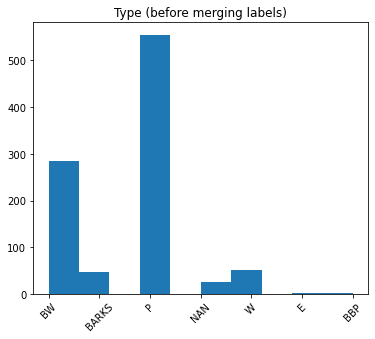

P        553
BW       285
W         51
BARKS     48
NAN       26
E          3
BBP        2
Name: type, dtype: int64


In [9]:
# histogram of types
plt.figure(figsize=(6,5))
plt.title('Type (before merging labels)')
plt.hist(df['type'], bins=10)
plt.xticks(rotation=45)
plt.show()
print(df['type'].value_counts())

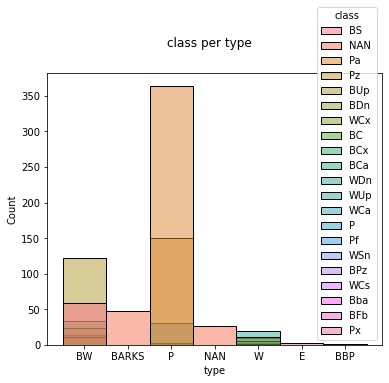

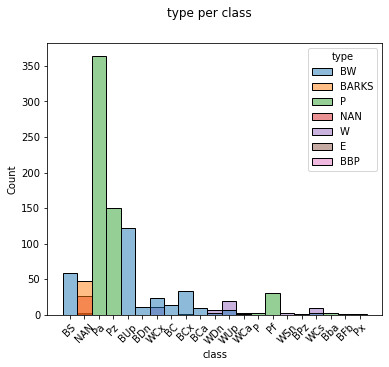

In [10]:
# histogram of classes
plt.figure(figsize=(6,5))

sns.histplot(df[['type','class']].reset_index(drop=True), x='type', hue='class')
plt.suptitle('class per type')
plt.show()

plt.figure(figsize=(6,5))

sns.histplot(df[['type','class']].reset_index(drop=True), x='class', hue='type')
plt.suptitle('type per class')
plt.xticks(rotation=45)
plt.show()

In [11]:
## length per type - this is commented out since it is not informative with so many options in x axis
# sns.histplot(df[['class','length']].round(0).reset_index(drop=True), x='length', hue='class', palette='viridis')
# plt.suptitle('class per length')
# plt.xticks(rotation=45)
# plt.show()

print(f"\nMean length per class:\n{df[['class','length']].groupby('class').mean()}")
print(f"\nMax length per class:\n{df[['class','length']].groupby('class').max()}")

print(f"\nMean length per type:\n{df[['type','length']].groupby('type').mean()}")
print(f"\nMax length per type:\n{df[['type','length']].groupby('type').max()}")


Mean length per class:
          length
class           
BC      0.172913
BCa     0.209998
BCx     0.292381
BDn     0.229272
BFb     0.143584
BPz     0.197280
BS      0.814031
BUp     0.291827
Bba     0.058027
NAN    10.290901
P       0.093899
Pa      0.062218
Pf      0.140827
Px      0.249942
Pz      0.497914
WCa     0.285262
WCs     0.256588
WCx     0.326465
WDn     0.240411
WSn     0.699546
WUp     0.411354

Max length per class:
          length
class           
BC      0.404006
BCa     0.616499
BCx     0.706172
BDn     0.371546
BFb     0.143584
BPz     0.197280
BS      1.722025
BUp     0.999850
Bba     0.074578
NAN    78.491094
P       0.154008
Pa      0.170219
Pf      0.271260
Px      0.249942
Pz     11.748635
WCa     0.501608
WCs     0.520318
WCx     0.518906
WDn     0.383313
WSn     0.786850
WUp     0.703079

Mean length per type:
          length
type            
BARKS  11.337610
BBP     2.649912
BW      0.391295
E       2.380434
NAN     9.468748
P       0.185539
W       0.36

### Merge classes according to the mapper supplied above

In [12]:
# df['type'] = df['type'].replace(types_mapper_merger)
# plt.figure(figsize=(6,5))

# sns.histplot(df[['type','class']].reset_index(drop=True), x='class', hue='type')
# plt.suptitle('type per class')
# plt.xticks(rotation=45)
# plt.show()

# # histogram of types
# available_types = df['type'].unique()
# print(f'available_types: {available_types}')
# plt.figure(figsize=(6,5))
# plt.title('Type')
# plt.hist(df['type'], bins=len(available_types))
# plt.show()

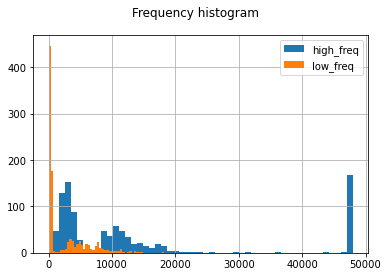

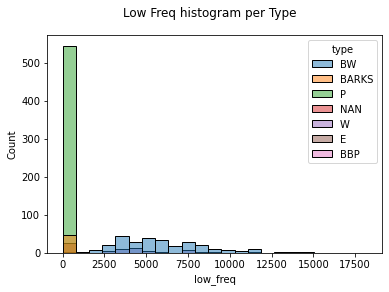

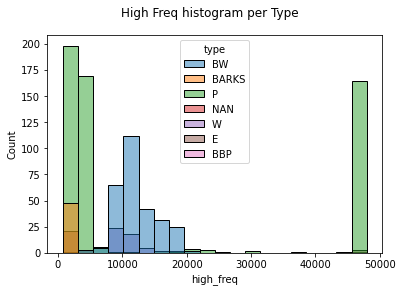

In [13]:
# frequencies
df["high_freq"].hist(bins=50, legend=True)
df["low_freq"].hist(bins=50, legend=True)
plt.suptitle('Frequency histogram')
plt.show()

sns.histplot(df[['low_freq', 'type', 'high_freq']].reset_index(drop=True), x='low_freq', hue='type')
plt.suptitle('Low Freq histogram per Type')
plt.show()

sns.histplot(df[['low_freq', 'type', 'high_freq']].reset_index(drop=True), x='high_freq', hue='type')
plt.suptitle('High Freq histogram per Type')
plt.show()

### Set a proper sample rate given the frequencies distribution

the highest frequencies should help us define the desired sample_rate (how to resample the signal).
We'd maybe like to resample into a smaller rate; if it's possible, it helps with smaller spectrogram and less noise that may be present. However, but by doing this we may sacrify some signals, if these are present in high freq only.
Therefore, we should investigate the calls with highest frequencies and ask:
- Are such calls present in lower frequencies too? if so, they are discriminative even if we'll drop the high freqs.

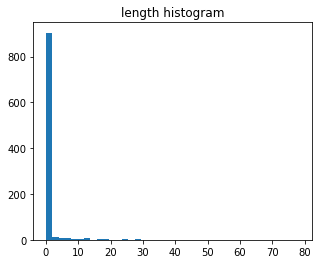

62 too big samples - need to verify what's in there:
types:
BARKS    42
NAN      16
P         2
E         1
BBP       1
Name: type, dtype: int64
type
BARKS    12.733146
BBP       5.156240
E         5.153828
NAN      15.173851
P         9.846738
Name: length, dtype: float64


382 too short samples
types:
P      349
BW      29
NAN      2
W        2
Name: type, dtype: int64
type
BW     0.069670
NAN    0.087114
P      0.058016
W      0.082570
Name: length, dtype: float64


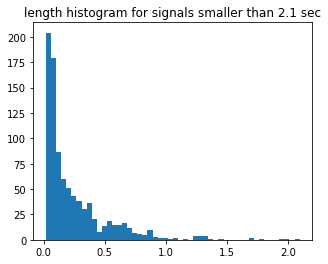

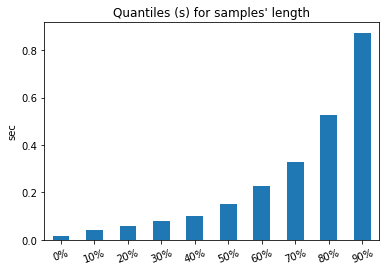

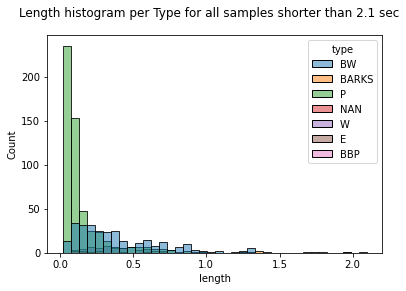

In [14]:
# lengths
plt.figure(figsize=(5,4))
plt.title('length histogram')
plt.hist(df['length'], bins=40)
plt.show()

TH_max_seq_len, TH_min_seq_len = 2.1, 0.1
too_big_samples = df[df["length"] > TH_max_seq_len]
too_short_samples = df[df["length"] < TH_min_seq_len]
print(f'{len(too_big_samples)} too big samples - need to verify what\'s in there:\n'
      # f'indices: {too_big_samples.index}\n'
      f'types:\n{too_big_samples["type"].value_counts()}')
print(too_big_samples.groupby("type")['length'].mean())

print(f'\n\n{len(too_short_samples)} too short samples')
print(f'types:\n{too_short_samples["type"].value_counts()}')
print(too_short_samples.groupby("type")['length'].mean())


plt.figure(figsize=(5,4))
plt.title(f'length histogram for signals smaller than {TH_max_seq_len} sec')
plt.hist(df['length'][df['length'] < TH_max_seq_len], bins=50)
plt.show()


quantile_keys = np.arange(0, 1, 0.1)
pd.Series(np.quantile(df['length'], quantile_keys), index=map(lambda x: f'{x:.0%}', quantile_keys), name='Quantiles').plot.bar()
plt.title('Quantiles (s) for samples\' length')
plt.xticks(rotation=20)
plt.ylabel('sec')
plt.show()

sns.histplot(df[['length', 'type']][df['length'] < TH_max_seq_len].reset_index(drop=True), x='length', hue='type')
plt.suptitle(f'Length histogram per Type for all samples shorter than {TH_max_seq_len} sec')
plt.show()

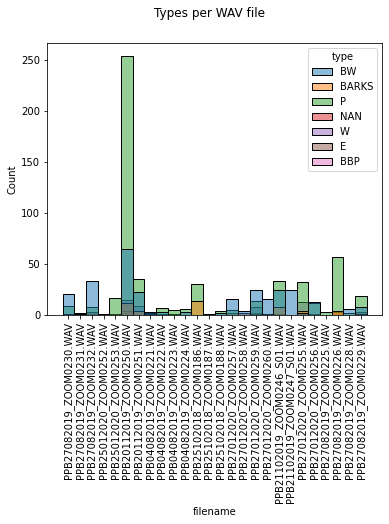

number of wav files available: 26

wav approx length (according to the end_time of the last annotated sample):
                        filename     end_time       annotation_source
0       PPB04082019_ZOOM0221.WAV   129.178560         PPB_2019_Aug_04
1       PPB04082019_ZOOM0222.WAV   364.467846         PPB_2019_Aug_04
2       PPB04082019_ZOOM0223.WAV   524.499365         PPB_2019_Aug_04
3       PPB04082019_ZOOM0224.WAV   676.889016         PPB_2019_Aug_04
4       PPB20112019_ZOOM0250.WAV   712.712519         PPB_2019_Nov_20
5       PPB20112019_ZOOM0251.WAV   956.213393         PPB_2019_Nov_20
6   PPB21102019_ZOOM0246_S01.WAV   170.976964         PPB_2019_Oct_21
7   PPB21102019_ZOOM0247_S01.WAV   373.306751         PPB_2019_Oct_21
8       PPB25012020_ZOOM0252.WAV     3.986442         PPB_2020_Jan_25
9       PPB25012020_ZOOM0253.WAV   360.172390         PPB_2020_Jan_25
10      PPB25102018_ZOOM0186.WAV   240.989398         PPB_2018_Oct_25
11      PPB25102018_ZOOM0187.WAV   302.854541    

In [15]:
## find the most interesting WAV to take a careful look at
plt.figure(figsize=(6,5))
sns.histplot(df[['filename', 'type', 'length']].reset_index(drop=True), x='filename', hue='type')
plt.suptitle('Types per WAV file')
plt.xticks(rotation=90)
plt.show()

print(f"number of wav files available: {len(df['filename'].unique())}")
print('\nwav approx length (according to the end_time of the last annotated sample):')
print(df[['filename','end_time', 'annotation_source']].loc[df.groupby('filename')['end_time'].idxmax()].reset_index(drop=True))

In [16]:
f"the signal with the highest initial freq starts at: {df['low_freq'].max()} Hz"

'the signal with the highest initial freq starts at: 18204.082 Hz'

In [17]:
cond =  (df['high_freq']>40000) & (df['low_freq']>15000)
df[cond]

,begin_time,end_time,filename,length,low_freq,high_freq,peak_freq,class,type,annotation_source
212,193.339368,193.444082,PPB20112019_ZOOM0250.WAV,0.104714,18204.082,48000.0,38625.0,Pf,P,PPB_2019_Nov_20


## overlapping signals - keep chains (break them if needed), remove instances

In [18]:
## make sure that there are no overlapping tags
g = df[['begin_time', 'end_time', 'filename', 'type', 'class', 'length']].groupby('filename')
# sort based on begin_time
g.apply(lambda x: x.sort_values(by='begin_time', ascending=False))

begin_time    end_time  \
filename                                               
PPB04082019_ZOOM0221.WAV 523  128.761131  129.178560   
                         522  124.261044  124.939019   
                         521  119.144994  119.239954   
                         520   39.821602   40.137401   
                         519   15.129994   15.483336   
...                                  ...         ...   
PPB27082019_ZOOM0232.WAV 39   582.222347  582.474851   
                         38   581.075980  581.227483   
                         37   576.778997  577.064326   
                         36   572.330512  572.487064   
                         35   571.856075  571.997477   

                                              filename type class    length  
filename                                                                     
PPB04082019_ZOOM0221.WAV 523  PPB04082019_ZOOM0221.WAV   BW   WCx  0.417429  
                         522  PPB04082019_ZOOM0221.WAV   BW    BS  0.677975  
                         521  PPB04082019_ZOOM0221.WAV   BW   BUp  0.094961  
                         520  PPB04082019_ZOOM0221.WAV    P    Pz  0.315800  
                         519  PPB04082019_ZOOM0221.WAV    P    Pz  0.353342  
...                                                ...  ...   ...       ...  
PPB27082019_ZOOM0232.WAV 39   PPB27082019_ZOOM0232.WAV   BW   BCa  0.252504  
                         38   PPB27082019_ZOOM0232.WAV   BW   BDn  0.151502  
                         37   PPB27082019_ZOOM0232.WAV   BW   BCx  0.285329  
                         36   PPB27082019_ZOOM0232.WAV   BW    BC  0.156552  
                         35   PPB27082019_ZOOM0232.WAV   BW   BCx  0.141402  

[968 rows x 6 columns]

In [19]:
def find_containers(grouped_df):
    '''
    given a df grouped by filename, creates a list of container-contained pairs per file:
    [(container_index, container), (is_contained)], and wraps them into a df
    
    return: dict which maps a file name, to all the pairs of container-contained in this file
    '''
    final_results = {}
    for name, df in grouped_df:
        # iterate through the DataFrame
        container = None
        is_contained = []
        results = []
        for j, (index, row) in enumerate(df.iterrows()):
            if j==0:
                previous_row = row
                previous_index = index
                continue
            if previous_row['end_time'] > row['end_time']:  # it is promised that previous_row['begin_time'] < row['begin_time'] since it is sorted
                # previous_row is a container
                container = previous_row
                container_index = previous_index
                row['index']=index
                is_contained.append((row))
            else:
                # the current row is not contained, it's maybe a container
                previous_row = row
                previous_index = index
                if container is not None:
                    results.append([(container_index, container), (is_contained)])
                    container = None
                    is_contained = []

        # add the last group, if any
        if container is not None:
            results.append([(container_index, container), (is_contained)])
        if len(results) > 0:
            final_results[name] = results
    return final_results

def mean_std_distances(df):
    df['center'] = (df['end_time']-df['begin_time']) /2 + df['begin_time']  # center of each call
    distances = df['center'].diff()  # diff between centers of different calls 
    return {'mean': round(distances.mean(), 4), 'std': round(distances.std(), 4), 'max': round(distances.max(), 4), 'all': distances}

In [20]:
containers = find_containers(g)
print(f'example to (container_index, container):\n{containers[list(containers.keys())[0]][0][0]}') # containers[first_file][first (container_index, container), (is_contained) pair][first tuple]}')
print(f'\n\nexample of list of segments which are contained - length:{len(containers[list(containers.keys())[0]][0][1])}') # containers[first_file][first (container_index, container), (is_contained) pair][second tuple]}')

example to (container_index, container):
(101, begin_time                   37.844307
end_time                    116.335402
filename      PPB20112019_ZOOM0250.WAV
type                             BARKS
class                              NAN
length                       78.491094
Name: 101, dtype: object)


example of list of segments which are contained - length:68


In [21]:
max_diff = 0.98

# create a df from the dict "containers"
chains_df = pd.DataFrame()
for file, container_contained_pairs in containers.items():
    for pair in container_contained_pairs:
        container, are_contained = pair
        index_container, container = container
        are_contained = pd.DataFrame(are_contained)
        
        ## find too distant segments
        distances = mean_std_distances(pd.DataFrame(are_contained))
        print(f"\ndistances['max']: {distances['max']}")
        too_distant = distances['all'] > max_diff
        change_indices = too_distant.index[too_distant.diff() == True].tolist()
        
        if len(change_indices)>0:
            # split the indices into segments
            segments = [list(range(change_indices[i], change_indices[i+1])) for i in range(len(change_indices)-1)]
            segments.append(list(range(change_indices[-1], len(too_distant))))

            # for each segment that meets the condition of not exceeding max length between instances - write it to the df
            for i, segment in enumerate(segments, start=1):
                print(f"Segment {i}: {segment}")
                if len(segment) < 2:
                    continue

                rel_are_contained = are_contained[are_contained['index'].isin(segment)]
                begin_time = rel_are_contained.loc[rel_are_contained.index[0], 'begin_time']
                end_time = rel_are_contained.loc[rel_are_contained.index[-1], 'end_time']
                types_classes_contained = list(set([(l['class'],l['type']) for _,l in rel_are_contained.iterrows()]))
                indices_are_contained = [l['index'] for _,l in rel_are_contained.iterrows()]
                instances_average_length = round(np.mean([l['length'] for _,l in rel_are_contained.iterrows()]), 3)


                chains_df = chains_df.append({'filename': file,
                                              'original_df_index': int(index_container),
                                              'container type and class': (container['type'], container['class']),
                                              'container_begin_time': begin_time,
                                              'container_end_time': end_time,
                                              'container length': round(end_time-begin_time,3),
                                              'indices_are_contained': indices_are_contained,
                                              'unique_types_classes_contained': types_classes_contained, 
                                              'num_instances': len(rel_are_contained)}, ignore_index=True)
        else:
            types_classes_contained = list(set([(l['class'],l['type']) for _,l in are_contained.iterrows()]))
            indices_are_contained = [l['index'] for _,l in are_contained.iterrows()]
            instances_average_length = round(np.mean([l['length'] for _,l in are_contained.iterrows()]), 3)
            
            chains_df = chains_df.append({'filename': file, 
                                          'original_df_index': int(index_container),
                                          'container type and class': (container['type'], container['class']),
                                          'container_begin_time': container['begin_time'], 'container_end_time': container['end_time'],
                                          'container length': round(container['length'],3), 'indices_are_contained': indices_are_contained, 'unique_types_classes_contained': types_classes_contained, 
                                          'num_instances': len(are_contained),
                                          'instances_average_distance': distances['mean'],
                                          'instances_std_distace': distances['std'],
                                          'instances_max_distace': distances['max'],
                                          'all_dists': distances['all']}, ignore_index=True)


distances['max']: 3.3801
Segment 1: [114]
Segment 2: [115, 116, 117, 118, 119, 120, 121, 122]
Segment 3: [123]
Segment 4: [124, 125, 126, 127]
Segment 5: [128]
Segment 6: [129]
Segment 7: [130, 131]
Segment 8: [132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142]
Segment 9: [143]
Segment 10: [144]
Segment 11: [145]
Segment 12: [146, 147]
Segment 13: [148]
Segment 14: [149, 150]
Segment 15: [151]
Segment 16: [152, 153, 154, 155, 156, 157]
Segment 17: [158, 159, 160]
Segment 18: [161]
Segment 19: [162, 163]
Segment 20: [164, 165, 166]
Segment 21: [167]
Segment 22: []

distances['max']: 0.7721

distances['max']: 2.594
Segment 1: [182]
Segment 2: [183]
Segment 3: [184]
Segment 4: []

distances['max']: 1.0193
Segment 1: [204]
Segment 2: []

distances['max']: 2.9847
Segment 1: [228]
Segment 2: [229, 230, 231, 232, 233, 234]
Segment 3: [235]
Segment 4: [236, 237]
Segment 5: [238]
Segment 6: []

distances['max']: 0.8454

distances['max']: 0.2952

distances['max']: nan

distances['max']: 1.4

In [22]:
## Following Amber's answer, (NAN,NAN) should be mapped to "barks"
chains_df['container type and class'] = chains_df['container type and class'].apply(
    lambda x: ('BARKS', 'NAN') if x == ('NAN', 'NAN') else x
)

In [23]:
chains_df.head(10)

,filename,original_df_index,container type and class,container_begin_time,container_end_time,container length,indices_are_contained,unique_types_classes_contained,num_instances,all_dists,instances_average_distance,instances_max_distace,instances_std_distace
0,PPB20112019_ZOOM0250.WAV,101.0,"(BARKS, NAN)",77.144566,80.334144,3.190,"[115, 116, 117, 118, 119, 120, 121, 122]","[(Pa, P)]",8.0,NaN,NaN,NaN,NaN
1,PPB20112019_ZOOM0250.WAV,101.0,"(BARKS, NAN)",81.691837,83.053588,1.362,"[124, 125, 126, 127]","[(Pa, P)]",4.0,NaN,NaN,NaN,NaN
2,PPB20112019_ZOOM0250.WAV,101.0,"(BARKS, NAN)",85.687921,87.203680,1.516,"[130, 131]","[(Pa, P)]",2.0,NaN,NaN,NaN,NaN
3,PPB20112019_ZOOM0250.WAV,101.0,"(BARKS, NAN)",87.608963,91.143026,3.534,"[132, 133, 134, 135, 136, 137, 138, 139, 140, ...","[(Pa, P)]",11.0,NaN,NaN,NaN,NaN
4,PPB20112019_ZOOM0250.WAV,101.0,"(BARKS, NAN)",94.912153,95.029685,0.118,"[146, 147]","[(Pa, P)]",2.0,NaN,NaN,NaN,NaN
5,PPB20112019_ZOOM0250.WAV,101.0,"(BARKS, NAN)",97.202003,98.077411,0.875,"[149, 150]","[(Pa, P)]",2.0,NaN,NaN,NaN,NaN
6,PPB20112019_ZOOM0250.WAV,101.0,"(BARKS, NAN)",99.556694,101.923542,2.367,"[152, 153, 154, 155, 156, 157]","[(Pa, P)]",6.0,NaN,NaN,NaN,NaN
7,PPB20112019_ZOOM0250.WAV,101.0,"(BARKS, NAN)",103.840528,107.090893,3.250,"[158, 159, 160]","[(Pa, P)]",3.0,NaN,NaN,NaN,NaN
8,PPB20112019_ZOOM0250.WAV,101.0,"(BARKS, NAN)",108.967354,112.404149,3.437,"[162, 163]","[(Pa, P), (P, P)]",2.0,NaN,NaN,NaN,NaN
9,PPB20112019_ZOOM0250.WAV,101.0,"(BARKS, NAN)",112.436572,113.510572,1.074,"[164, 165, 166]","[(Pa, P)]",3.0,NaN,NaN,NaN,NaN


In [24]:
## given the info we detected in chains_df, we now want to:
# (1) break too long chains into parts
# (2) break chains if another signal (unrelated) is in there
# (3) erase the instances ("contained" segment)

In [25]:
df_to_filter = df.copy()  # we need here the df with which we have created the grouped df (by filename)

In [26]:
# ## deeper look at the NAN samples - no need since Amber said what should they be
# counter = 0
# total_length = 0
# total_instances = 0
# nan_df_org = pd.DataFrame()
# for _,row in chains_df.iterrows():
#     if row['container type and class'][0]=='NAN':
#         counter+=1
#         total_length += row['container length']
#         total_instances += row['num_instances']
#         nan_df_org = nan_df_org.append(row)
# nan_df = nan_df_org.copy()
# print(counter,'--', round(total_length, 3), '--', total_instances)
# print(len(chains_df), '--', round(sum(chains_df['container length'], 3)), '--', sum(chains_df['num_instances']))
# nan_df = nan_df[['filename', 'container type and class', 'container_begin_time', 'container_end_time',  'unique_types_classes_contained', 'num_instances']]
# nan_df.reset_index(drop=True)

# nan_df_org

In [27]:
## build the filtered df according to the matched segments with resonable length
df_filtered = pd.DataFrame(columns=df_to_filter.columns)
max_length = 3.
chains_df = chains_df.sort_values(by='original_df_index', ascending=True)
for index, row in chains_df.iterrows():
    # print(index)
    # if the sequence contains not only instances of the same chain, but also unrelated signals - we should break it such that it won't contain them
    if len(row['unique_types_classes_contained']) > 1:
        for subcall_idx, (_, typ) in enumerate(row['unique_types_classes_contained']):
            if type_mapper_merger[typ] != type_mapper_merger[row['container type and class'][0]]:
                # we have here a row which is not of the same kind of all others, we should split
                
                # concat the chain until here
                index_in_full_df = row['indices_are_contained'][subcall_idx]
                new_end_time = df_to_filter.loc[index_in_full_df, 'begin_time']
                row_to_append = df_to_filter.iloc[int(row['original_df_index'])]
                row_to_append['begin_time'] = row['container_begin_time']
                row_to_append['end_time'] = new_end_time
                row_to_append['length'] = row_to_append['end_time'] - row_to_append['begin_time']
                
                if row_to_append['length']<0:
                    # it can happen since the smaller calls are sometimes overlapping
                    print(f"drop overlapping calls in index_in_full_df: {index_in_full_df}")
                    continue
                if len(df_filtered) == 0:
                    df_filtered = row_to_append.to_frame().transpose()
                else:
                    df_filtered = pd.concat([df_filtered, row_to_append.to_frame().transpose()])
                # concat the smaller call which is not really related to the chain even though it's contained
                df_filtered = pd.concat([df_filtered, df.iloc[index_in_full_df].to_frame().transpose()])
                # update the row details
                row['container_begin_time'] =  df_to_filter.loc[index_in_full_df, 'end_time']  # update the chain with the new start time after the trimming
                row['container length'] = row['container_end_time'] - row['container_begin_time']
            else:
                pass # all instances are of the same type
        # insert what's left
        if row['container length']>0:
            row_to_append = df_to_filter.iloc[int(row['original_df_index'])]
            row_to_append['begin_time'] = row['container_begin_time'] # row_to_append['end_time'] remains as is
            row_to_append['length'] = row_to_append['end_time'] - row_to_append['begin_time']
            df_filtered = pd.concat([df_filtered, row_to_append.to_frame().transpose()])
        else:
            pass
    else:
        df_filtered = pd.concat([df_filtered, df_to_filter.iloc[int(row['original_df_index'])].to_frame().transpose()])


drop overlapping calls in index_in_full_df: 651


/home/shai/anaconda3/envs/dvoice/lib/python3.7/site-packages/pandas/core/series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cacher_needs_updating = self._check_is_chained_assignment_possible()


In [28]:
df_filtered.head()

,begin_time,end_time,filename,length,low_freq,high_freq,peak_freq,class,type,annotation_source
1,33.030652,34.99513,PPB27082019_ZOOM0230.WAV,1.964478,0.0,1284.672,375.0,NAN,BARKS,PPB_2019_Aug_27_2_of_2
98,205.573577,207.881309,PPB25012020_ZOOM0253.WAV,2.307732,0.0,2335.766,0.0,NAN,NAN,PPB_2020_Jan_25
101,37.844307,116.335402,PPB20112019_ZOOM0250.WAV,78.491094,0.0,1635.036,0.0,NAN,BARKS,PPB_2019_Nov_20
101,108.967354,116.335402,PPB20112019_ZOOM0250.WAV,7.368048,0.0,1635.036,0.0,NAN,BARKS,PPB_2019_Nov_20
101,37.844307,116.335402,PPB20112019_ZOOM0250.WAV,78.491094,0.0,1635.036,0.0,NAN,BARKS,PPB_2019_Nov_20


<AxesSubplot:>

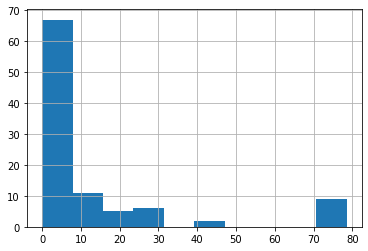

In [29]:
df_filtered['length'].hist()

In [30]:
f"before we had {chains_df.shape} objects and now we have {df_filtered.shape}"

'before we had (66, 13) objects and now we have (100, 10)'

In [31]:
##############################
def break_too_long_calls(df_filtered):
    df_filtered_2 = pd.DataFrame()
    # after breaking what was unrelated, we should now break if it's too long         
    for index, row in df_filtered.iterrows():    
        # if the sequence is too long, we should break it into segments
        if row['length'] > max_length:
            while row['length'] > max_length:
                row_to_append = row.copy()
                row_to_append['length']=max_length
                row_to_append['end_time'] = row_to_append['begin_time'] +max_length
                df_filtered_2 = pd.concat([df_filtered_2, row_to_append.to_frame().transpose()])
                # update row
                row['begin_time'] += max_length
                row['length'] = row['end_time']-row['begin_time']
            # remainder
            df_filtered_2 = pd.concat([df_filtered_2, row.to_frame().transpose()])
        else:
            df_filtered_2 = pd.concat([df_filtered_2, row.to_frame().transpose()])
    return df_filtered_2

df_filtered_2 = break_too_long_calls(df_filtered)

In [32]:
print(f"before we had {df_filtered.shape} objects and now we have {df_filtered_2.shape}")
df_filtered_2.head()

before we had (100, 10) objects and now we have (507, 10)


,begin_time,end_time,filename,length,low_freq,high_freq,peak_freq,class,type,annotation_source
1,33.030652,34.99513,PPB27082019_ZOOM0230.WAV,1.964478,0.0,1284.672,375.0,NAN,BARKS,PPB_2019_Aug_27_2_of_2
98,205.573577,207.881309,PPB25012020_ZOOM0253.WAV,2.307732,0.0,2335.766,0.0,NAN,NAN,PPB_2020_Jan_25
101,37.844307,40.844307,PPB20112019_ZOOM0250.WAV,3.0,0.0,1635.036,0.0,NAN,BARKS,PPB_2019_Nov_20
101,40.844307,43.844307,PPB20112019_ZOOM0250.WAV,3.0,0.0,1635.036,0.0,NAN,BARKS,PPB_2019_Nov_20
101,43.844307,46.844307,PPB20112019_ZOOM0250.WAV,3.0,0.0,1635.036,0.0,NAN,BARKS,PPB_2019_Nov_20


<AxesSubplot:>

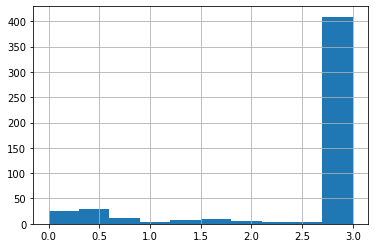

In [33]:
df_filtered_2['length'].hist()

In [34]:
## check that all the chains had been taken care
org_inds_of_what_present_in_the_filtered_df = pd.unique(df_filtered_2.index)
idx_present = [int(i) in org_inds_of_what_present_in_the_filtered_df for i in chains_df['original_df_index']]
idx_not_present = [int(i) not in org_inds_of_what_present_in_the_filtered_df for i in chains_df['original_df_index']]
print(f"idx_present: {sum(idx_present)}, idx_not_present: {sum(idx_not_present)}")
chains_df[idx_not_present]

idx_present: 66, idx_not_present: 0


,filename,original_df_index,container type and class,container_begin_time,container_end_time,container length,indices_are_contained,unique_types_classes_contained,num_instances,all_dists,instances_average_distance,instances_max_distace,instances_std_distace


In [35]:
chains_df.head()

,filename,original_df_index,container type and class,container_begin_time,container_end_time,container length,indices_are_contained,unique_types_classes_contained,num_instances,all_dists,instances_average_distance,instances_max_distace,instances_std_distace
65,PPB27082019_ZOOM0230.WAV,1.0,"(BARKS, NAN)",33.030652,34.995130,1.964,"[2, 3, 4, 5, 6, 7, 8]","[(Pa, P)]",7.0,2 NaN 3 0.256202 4 0.252778 5 ...,0.2649,0.283,0.0115
42,PPB25012020_ZOOM0253.WAV,98.0,"(BARKS, NAN)",205.573577,207.881309,2.308,[99],"[(Pz, P)]",1.0,"99 NaN Name: center, dtype: float64",NaN,NaN,NaN
9,PPB20112019_ZOOM0250.WAV,101.0,"(BARKS, NAN)",112.436572,113.510572,1.074,"[164, 165, 166]","[(Pa, P)]",3.0,NaN,NaN,NaN,NaN
8,PPB20112019_ZOOM0250.WAV,101.0,"(BARKS, NAN)",108.967354,112.404149,3.437,"[162, 163]","[(Pa, P), (P, P)]",2.0,NaN,NaN,NaN,NaN
7,PPB20112019_ZOOM0250.WAV,101.0,"(BARKS, NAN)",103.840528,107.090893,3.250,"[158, 159, 160]","[(Pa, P)]",3.0,NaN,NaN,NaN,NaN


In [36]:
# use explode to convert lists to separate rows
all_instances_conatined = chains_df.explode('indices_are_contained')
# concatenate all the lists into one
all_instances_conatined_list = all_instances_conatined['indices_are_contained'].tolist()

In [37]:
# we should now concat the chains into the rest of the df, but we should ignore both the idx of the containers and the idx of the segmented they contained
df_to_merge = df_to_filter[~df_to_filter.index.isin(org_inds_of_what_present_in_the_filtered_df)]
df_to_merge = df_to_merge[~df_to_merge.index.isin(all_instances_conatined_list)]
df_to_merge.count()

begin_time           651
end_time             651
filename             651
length               651
low_freq             651
high_freq            651
peak_freq            651
class                651
type                 651
annotation_source    651
dtype: int64

In [38]:
## check length of df_to_merge calls
df_to_merge[df_to_merge['length']> 3]  # we have container that their instances had not been annotated

,begin_time,end_time,filename,length,low_freq,high_freq,peak_freq,class,type,annotation_source
31,246.389955,254.777677,PPB27082019_ZOOM0231.WAV,8.387722,0.0,1635.036,0.00,NAN,BARKS,PPB_2019_Aug_27_2_of_2
180,136.000187,149.420735,PPB20112019_ZOOM0250.WAV,13.420548,0.0,1401.460,0.00,NAN,BARKS,PPB_2019_Nov_20
201,185.173574,192.636754,PPB20112019_ZOOM0250.WAV,7.463180,0.0,1868.613,0.00,NAN,NAN,PPB_2019_Nov_20
391,538.020947,562.066327,PPB20112019_ZOOM0250.WAV,24.045380,0.0,1518.248,0.00,NAN,NAN,PPB_2019_Nov_20
445,687.668839,694.813681,PPB20112019_ZOOM0250.WAV,7.144842,0.0,1401.460,562.50,NAN,BARKS,PPB_2019_Nov_20
452,741.154103,759.220646,PPB20112019_ZOOM0251.WAV,18.066542,0.0,1635.036,0.00,NAN,BARKS,PPB_2019_Nov_20
490,863.290434,869.456808,PPB20112019_ZOOM0251.WAV,6.166374,0.0,1985.401,0.00,NAN,BARKS,PPB_2019_Nov_20
525,165.490735,173.435574,PPB04082019_ZOOM0222.WAV,7.944840,0.0,48000.000,0.00,Pz,P,PPB_2019_Aug_04
535,416.633723,421.787551,PPB04082019_ZOOM0223.WAV,5.153828,0.0,48000.000,0.00,NAN,E,PPB_2019_Aug_04
555,47.291493,51.783142,PPB25102018_ZOOM0186.WAV,4.491649,0.0,1457.701,0.00,NAN,BARKS,PPB_2018_Oct_25


In [39]:
## add all the data which is not in chains to this df
df_filtered_final = pd.concat([df_filtered_2, df_to_merge])

In [40]:
#finalize df_filtered_final
# df_filtered_final = break_too_long_calls(df_filtered_final) I don't want to break it on purpose, to do not sample it more - I trust those samples less then the others
df_filtered_final = df_filtered_final.sort_values(by=['filename', 'begin_time'])
df_filtered_final['filename'].value_counts()

PPB20112019_ZOOM0250.WAV        581
PPB20112019_ZOOM0251.WAV         68
PPB21102019_ZOOM0246_S01.WAV     55
PPB27082019_ZOOM0226.WAV         53
PPB27082019_ZOOM0232.WAV         48
PPB25102018_ZOOM0186.WAV         47
PPB27012020_ZOOM0259.WAV         45
PPB27012020_ZOOM0255.WAV         32
PPB27082019_ZOOM0229.WAV         31
PPB27012020_ZOOM0257.WAV         30
PPB27012020_ZOOM0256.WAV         25
PPB21102019_ZOOM0247_S01.WAV     24
PPB27082019_ZOOM0230.WAV         23
PPB27012020_ZOOM0260.WAV         17
PPB25012020_ZOOM0253.WAV         16
PPB04082019_ZOOM0222.WAV         11
PPB04082019_ZOOM0224.WAV          9
PPB27082019_ZOOM0228.WAV          8
PPB04082019_ZOOM0223.WAV          7
PPB04082019_ZOOM0221.WAV          6
PPB27012020_ZOOM0258.WAV          6
PPB25102018_ZOOM0188.WAV          6
PPB27082019_ZOOM0231.WAV          5
PPB27082019_ZOOM0225.WAV          3
PPB25102018_ZOOM0187.WAV          1
PPB25012020_ZOOM0252.WAV          1
Name: filename, dtype: int64

In [41]:
df_filtered_final.head()

,begin_time,end_time,filename,length,low_freq,high_freq,peak_freq,class,type,annotation_source
518,4.884327,6.657663,PPB04082019_ZOOM0221.WAV,1.773336,0.0,1073.826,0.0,NAN,BARKS,PPB_2019_Aug_04
519,15.129994,15.483336,PPB04082019_ZOOM0221.WAV,0.353342,0.0,23946.309,0.0,Pz,P,PPB_2019_Aug_04
520,39.821602,40.137401,PPB04082019_ZOOM0221.WAV,0.3158,0.0,48000.0,3750.0,Pz,P,PPB_2019_Aug_04
521,119.144994,119.239954,PPB04082019_ZOOM0221.WAV,0.094961,3543.624,4510.067,4125.0,BUp,BW,PPB_2019_Aug_04
522,124.261044,124.939019,PPB04082019_ZOOM0221.WAV,0.677975,3758.389,10308.725,8625.0,BS,BW,PPB_2019_Aug_04


In [42]:
"PPB20112019_ZOOM0250.WAV"

'PPB20112019_ZOOM0250.WAV'

In [43]:
def inference_csv_to_raven(df, channel=1):
    # create columns for raven format
    length_df = len(df['begin_time'])
    view = ['Spectrogram 1']*length_df
    selection = np.arange(1,length_df+1)
    channel = np.ones(length_df).astype(int) * channel
    bboxes = {'Selection': selection, 'View': view, 'Channel': channel,
              'Begin Time (s)': df['begin_time'], 'End Time (s)': df['end_time'],
              'Low Freq (Hz)': df['low_freq'], 'High Freq (Hz)': df['high_freq'], 'Annotation': df['type']}

    annotations_df = pd.DataFrame(data = bboxes)  # create dataframe

    return annotations_df

In [44]:
for name, g in df_filtered_final.groupby('filename'):
    raven = inference_csv_to_raven(g)
    raven.to_csv(f"{name.split('.')[0]}_raven.txt", sep="\t", index=False)

In [45]:
raven.head(20)

,Selection,View,Channel,Begin Time (s),End Time (s),Low Freq (Hz),High Freq (Hz),Annotation
35,1,Spectrogram 1,1,571.856075,571.997477,10627.737,11795.62,BW
36,2,Spectrogram 1,1,572.330512,572.487064,10627.737,11328.467,BW
37,3,Spectrogram 1,1,576.778997,577.064326,7007.299,10394.161,BW
38,4,Spectrogram 1,1,581.07598,581.227483,11678.832,12729.927,BW
39,5,Spectrogram 1,1,582.222347,582.474851,7941.606,9343.066,BW
40,6,Spectrogram 1,1,596.802367,596.875593,7941.606,8525.547,BW
41,7,Spectrogram 1,1,604.488443,604.609634,10471.198,12998.729,W
42,8,Spectrogram 1,1,604.922229,605.083409,9387.971,11562.044,BW
43,9,Spectrogram 1,1,620.347534,620.40056,8408.759,9226.277,BW
44,10,Spectrogram 1,1,620.544487,620.605088,8058.394,11094.891,BW


In [46]:
df.head()

,begin_time,end_time,filename,length,low_freq,high_freq,peak_freq,class,type,annotation_source
0,31.124609,32.013422,PPB27082019_ZOOM0230.WAV,0.888813,2802.920,12963.504,7875.0,BS,BW,PPB_2019_Aug_27_2_of_2
1,33.030652,34.995130,PPB27082019_ZOOM0230.WAV,1.964478,0.000,1284.672,375.0,NAN,BARKS,PPB_2019_Aug_27_2_of_2
2,33.290829,33.337618,PPB27082019_ZOOM0230.WAV,0.046790,259.754,2568.674,375.0,Pa,P,PPB_2019_Aug_27_2_of_2
3,33.551025,33.589826,PPB27082019_ZOOM0230.WAV,0.038801,288.615,3001.596,375.0,Pa,P,PPB_2019_Aug_27_2_of_2
4,33.806656,33.839752,PPB27082019_ZOOM0230.WAV,0.033095,230.892,2886.150,375.0,Pa,P,PPB_2019_Aug_27_2_of_2


In [47]:
f"df had had {df.shape} samples, but after the processing it now has {df_filtered_final.shape}"

'df had had (968, 10) samples, but after the processing it now has (1158, 10)'

In [48]:
df_filtered_final.value_counts('filename')

filename
PPB20112019_ZOOM0250.WAV        581
PPB20112019_ZOOM0251.WAV         68
PPB21102019_ZOOM0246_S01.WAV     55
PPB27082019_ZOOM0226.WAV         53
PPB27082019_ZOOM0232.WAV         48
PPB25102018_ZOOM0186.WAV         47
PPB27012020_ZOOM0259.WAV         45
PPB27012020_ZOOM0255.WAV         32
PPB27082019_ZOOM0229.WAV         31
PPB27012020_ZOOM0257.WAV         30
PPB27012020_ZOOM0256.WAV         25
PPB21102019_ZOOM0247_S01.WAV     24
PPB27082019_ZOOM0230.WAV         23
PPB27012020_ZOOM0260.WAV         17
PPB25012020_ZOOM0253.WAV         16
PPB04082019_ZOOM0222.WAV         11
PPB04082019_ZOOM0224.WAV          9
PPB27082019_ZOOM0228.WAV          8
PPB04082019_ZOOM0223.WAV          7
PPB04082019_ZOOM0221.WAV          6
PPB27012020_ZOOM0258.WAV          6
PPB25102018_ZOOM0188.WAV          6
PPB27082019_ZOOM0231.WAV          5
PPB27082019_ZOOM0225.WAV          3
PPB25102018_ZOOM0187.WAV          1
PPB25012020_ZOOM0252.WAV          1
dtype: int64

## Prepare data for training - Fix begin/end times to be files-relative

In [49]:
df_filtered_final['type'].value_counts()

BARKS    440
P        333
BW       262
NAN       74
W         43
E          3
BBP        3
Name: type, dtype: int64

<AxesSubplot:>

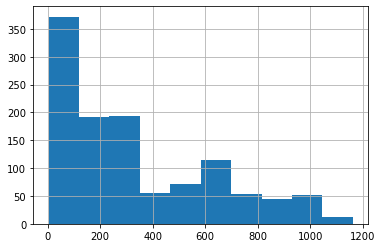

In [50]:
df_filtered_final['begin_time'].hist()

In [51]:
df_training = df_filtered_final[['begin_time','end_time','filename']].copy()
df_training['call_length']=df_filtered_final['length'].copy()
df_training['label']=df_filtered_final['type'].apply(lambda x: type_mapper_merger[x] if x in type_mapper_merger.keys() else 'NAN')
df_training['channel']=1
df_training.head()

,begin_time,end_time,filename,call_length,label,channel
518,4.884327,6.657663,PPB04082019_ZOOM0221.WAV,1.773336,B-P,1
519,15.129994,15.483336,PPB04082019_ZOOM0221.WAV,0.353342,B-P,1
520,39.821602,40.137401,PPB04082019_ZOOM0221.WAV,0.3158,B-P,1
521,119.144994,119.239954,PPB04082019_ZOOM0221.WAV,0.094961,whistle,1
522,124.261044,124.939019,PPB04082019_ZOOM0221.WAV,0.677975,whistle,1


In [52]:
wav_folder = '/mnt/shai2/soundbay/amber/'

In [53]:
## since Amber has tagged the data for a few WAV files at a time, the start and end times are not correct.
## We should fix it using the table she attached.
## The problem is seen in the following check:
train_files_list = set(df_training['filename'].unique())
# wavs lengths
wavs_length_dict = {}
for a in train_files_list:
    path_to_wav = f'{wav_folder}/{a}'
    wavs_length_dict[a]=sf.info(path_to_wav).frames/sf.info(path_to_wav).samplerate

# maximal end_time per file in the trainset
end_time_max_details = df_training.groupby('filename')['end_time'].max().reset_index()[['filename', 'end_time']]
end_time_dict = dict(zip(end_time_max_details['filename'],end_time_max_details['end_time']))

# print details about problematic files
for a in train_files_list:
    if wavs_length_dict[a] < end_time_dict[a]:
        print(f'file length: {wavs_length_dict[a]}, last end time: {end_time_dict[a]}')

file length: 396.0933333333333, last end time: 993.78232619
file length: 370.90933333333334, last end time: 720.33601935
file length: 301.088, last end time: 526.221635696
file length: 121.328, last end time: 302.85454103
file length: 299.65866666666665, last end time: 1051.117025801
file length: 117.07466666666667, last end time: 642.025437448
file length: 158.65066666666667, last end time: 478.870790843
file length: 177.428, last end time: 524.499365202
file length: 277.82933333333335, last end time: 360.172389513
file length: 139.124, last end time: 373.306751213
file length: 256.28, last end time: 364.467846386
file length: 271.964, last end time: 418.01398709
file length: 317.27066666666667, last end time: 393.651052826
file length: 279.132, last end time: 956.213392687
file length: 673.296, last end time: 1162.759179255
file length: 99.336, last end time: 676.889016025
file length: 276.888, last end time: 754.432204039


In [54]:
mapper_to_correct_times = pd.read_excel('/mnt/shai2/soundbay/amber/Summary of Hydrophone and Raven table data 17.08.2023.xlsx')
mapper_to_correct_times

,File Name,Location,Date Recorded (DD/MM/YYYY),File duration,No. annotated signals,Raven Table file name
0,ZOOM186,PPB,2018-10-25,00:04:28,43,PPB_2018_Oct_25.xls
1,ZOOM187,PPB,2018-10-25,00:00:00,1,PPB_2018_Oct_25.xls
2,ZOOM188,PPB,2018-10-25,00:00:00,6,PPB_2018_Oct_25.xls
3,ZOOM221,PPB,2019-08-04,00:02:38,6,PPB_2019_Aug_04.xls
4,ZOOM222,PPB,2019-08-04,00:04:16,11,PPB_2019_Aug_04.xls
5,ZOOM223,PPB,2019-08-04,00:02:57,7,PPB_2019_Aug_04.xls
6,ZOOM224,PPB,2019-08-04,00:01:39,9,PPB_2019_Aug_04.xls
7,ZOOM225,PPB,2019-08-27,00:05:33,3,PPB_2019_Aug_27_1_of_2.xls
8,ZOOM226,PPB,2019-08-27,00:02:38,64,PPB_2019_Aug_27_1_of_2.xls
9,ZOOM227,PPB,2019-08-27,00:01:13,0,PPB_2019_Aug_27_1_of_2.xls


In [55]:
files_suffix = df_training['filename'].str.split('.').str[0].str.split('_').str[1]
print(files_suffix)

518    ZOOM0221
519    ZOOM0221
520    ZOOM0221
521    ZOOM0221
522    ZOOM0221
         ...   
78     ZOOM0232
79     ZOOM0232
80     ZOOM0232
81     ZOOM0232
82     ZOOM0232
Name: filename, Length: 1158, dtype: object


In [56]:
suffix_to_full = dict(zip(files_suffix.unique(), df_training['filename'].unique()))
suffix_to_full

{'ZOOM0221': 'PPB04082019_ZOOM0221.WAV',
 'ZOOM0222': 'PPB04082019_ZOOM0222.WAV',
 'ZOOM0223': 'PPB04082019_ZOOM0223.WAV',
 'ZOOM0224': 'PPB04082019_ZOOM0224.WAV',
 'ZOOM0250': 'PPB20112019_ZOOM0250.WAV',
 'ZOOM0251': 'PPB20112019_ZOOM0251.WAV',
 'ZOOM0246': 'PPB21102019_ZOOM0246_S01.WAV',
 'ZOOM0247': 'PPB21102019_ZOOM0247_S01.WAV',
 'ZOOM0252': 'PPB25012020_ZOOM0252.WAV',
 'ZOOM0253': 'PPB25012020_ZOOM0253.WAV',
 'ZOOM0186': 'PPB25102018_ZOOM0186.WAV',
 'ZOOM0187': 'PPB25102018_ZOOM0187.WAV',
 'ZOOM0188': 'PPB25102018_ZOOM0188.WAV',
 'ZOOM0255': 'PPB27012020_ZOOM0255.WAV',
 'ZOOM0256': 'PPB27012020_ZOOM0256.WAV',
 'ZOOM0257': 'PPB27012020_ZOOM0257.WAV',
 'ZOOM0258': 'PPB27012020_ZOOM0258.WAV',
 'ZOOM0259': 'PPB27012020_ZOOM0259.WAV',
 'ZOOM0260': 'PPB27012020_ZOOM0260.WAV',
 'ZOOM0225': 'PPB27082019_ZOOM0225.WAV',
 'ZOOM0226': 'PPB27082019_ZOOM0226.WAV',
 'ZOOM0228': 'PPB27082019_ZOOM0228.WAV',
 'ZOOM0229': 'PPB27082019_ZOOM0229.WAV',
 'ZOOM0230': 'PPB27082019_ZOOM0230.WAV',
 'ZOOM02

In [57]:
df_training.head()

,begin_time,end_time,filename,call_length,label,channel
518,4.884327,6.657663,PPB04082019_ZOOM0221.WAV,1.773336,B-P,1
519,15.129994,15.483336,PPB04082019_ZOOM0221.WAV,0.353342,B-P,1
520,39.821602,40.137401,PPB04082019_ZOOM0221.WAV,0.3158,B-P,1
521,119.144994,119.239954,PPB04082019_ZOOM0221.WAV,0.094961,whistle,1
522,124.261044,124.939019,PPB04082019_ZOOM0221.WAV,0.677975,whistle,1


In [58]:
# collection is a batch of WAVs that Amber annotated together, when they were concatenated - so the their start and end time are related to each other
for i,collection in mapper_to_correct_times.groupby('Raven Table file name'):
    strt_time = 0
    for j, name in enumerate(collection['File Name']):
        name = name.replace('ZOOM', 'ZOOM0')
        if name not in suffix_to_full.keys():
            continue
        path_to_wav = f'{wav_folder}/{suffix_to_full[name]}'
        # print(j, strt_time)
        if j >0:
            df_training.loc[df_training['filename']==suffix_to_full[name], 'begin_time'] -= strt_time
            df_training.loc[df_training['filename']==suffix_to_full[name], 'end_time'] -= strt_time
        time_obj = sf.info(path_to_wav).frames/sf.info(path_to_wav).samplerate
        strt_time += time_obj

In [59]:
# df_training['begin_time'].hist(alpha=0.5)
# df_training['end_time'].hist(alpha=0.5)

In [60]:
### verification
train_files_list = set(df_training['filename'].unique())
problematic_files = []
# wavs lengths
wavs_length_dict = {}
for a in train_files_list:
    path_to_wav = f'{wav_folder}/{a}'
    wavs_length_dict[a]=sf.info(path_to_wav).frames/sf.info(path_to_wav).samplerate

# maximal end_time per file in the trainset
end_time_max_details = (df_training.groupby('filename')['end_time'].max().reset_index()[['filename', 'end_time']])
end_time_dict = dict(zip(end_time_max_details['filename'],end_time_max_details['end_time']))

# print details about problematic files
for a in train_files_list:
    if wavs_length_dict[a] < end_time_dict[a]:
        problematic_files.append(a)
        print(f'file:{a}, file length: {wavs_length_dict[a]}, last end time: {end_time_dict[a]}')

file:PPB27082019_ZOOM0228.WAV, file length: 117.07466666666667, last end time: 150.24543744800008


In [61]:
for problematic_file in problematic_files:
    print('problematic_file ',problematic_file, 'length ', wavs_length_dict[problematic_file])
    df_training[df_training['filename']==problematic_file].tail()

problematic_file  PPB27082019_ZOOM0228.WAV length  117.07466666666667


In [62]:
# for some reason one of the files still have some calls that exceed its length, so we are just going to filter them

for problematic_file in problematic_files:
    condition = (df_training['filename']==problematic_file) & (df_training['end_time']>wavs_length_dict[problematic_file])
    df_training = df_training.drop(df_training[condition].index)

## BG AS NOISE

In [63]:
def multirange_diff(r1_list, r2_list):
    """Generated the difference between two time ranges"""
    for r2 in r2_list:
        r1_list = list(itertools.chain(*[range_diff(r1, r2) for r1 in r1_list]))
    return r1_list

def range_diff(r1, r2):
    s1, e1 = r1
    s2, e2 = r2
    endpoints = sorted((s1, s2, e1, e2))
    result = []
    if endpoints[0] == s1 and endpoints[1] != s1:
        result.append((endpoints[0], endpoints[1]))
    if endpoints[3] == e1 and endpoints[2] != e1:
        result.append((endpoints[2], endpoints[3]))
    return result

In [64]:
## add noise in between calls
for file in df_training['filename']:
    file_length = sf.info(wav_folder + file).duration
    relevant_annot = df_training[df_training['filename'] == file]
    # Background is the subtraction of the annotated sections from the whole timerange in the file 
    bg_ranges = np.array(multirange_diff([(0, file_length)], [(relevant_annot['begin_time'].iloc[i], relevant_annot['end_time'].iloc[i]) for i in range(len(relevant_annot))])).astype(float)
    if len(bg_ranges)>1:
        # Noise exists in all channels, signal exists only in the channel it was annotated in
        bg_annot = pd.DataFrame({'channel': np.ones(len(bg_ranges), int), 'begin_time': bg_ranges[:, 0], 'end_time': bg_ranges[:, 1], 'call_length': bg_ranges[:, 1]-bg_ranges[:, 0], 'label': ['Noise']*len(bg_ranges), 'filename':[file] * len(bg_ranges)})

        df_training = pd.concat([df_training, bg_annot], axis=0, ignore_index=True)

In [65]:
print(df_training.count())

begin_time     1644
end_time       1644
filename       1644
call_length    1644
label          1644
channel        1644
dtype: int64


begin_time     1123
end_time       1123
filename       1123
call_length    1123
label          1123
channel        1123
dtype: int64

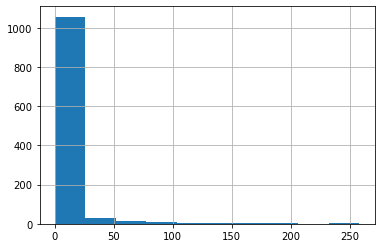

In [66]:
df_training = df_training[df_training['call_length']>0.3]

df_training['call_length'].hist()
df_training.count()

In [67]:
df_training[df_training['call_length']>10]

,begin_time,end_time,filename,call_length,label,channel
307,136.000187,149.420735,PPB20112019_ZOOM0250.WAV,13.420548,B-P,1
549,538.020947,562.066327,PPB20112019_ZOOM0250.WAV,24.04538,NAN,1
618,27.670103,45.736646,PPB20112019_ZOOM0251.WAV,18.066542,B-P,1
793,82.575336,109.642146,PPB25102018_ZOOM0186.WAV,27.066811,B-P,1
822,189.873621,200.631409,PPB25102018_ZOOM0186.WAV,10.757789,B-P,1
...,...,...,...,...,...,...
1605,91.412742,106.676868,PPB27082019_ZOOM0232.WAV,15.264126,Noise,1
1622,131.917166,151.740879,PPB27082019_ZOOM0232.WAV,19.823713,Noise,1
1624,153.849104,184.319639,PPB27082019_ZOOM0232.WAV,30.470534,Noise,1
1639,218.228642,229.097307,PPB27082019_ZOOM0232.WAV,10.868665,Noise,1


In [68]:
df_training['label'].value_counts()

B-P        499
Noise      396
whistle    158
NAN         70
Name: label, dtype: int64

In [69]:
df_training['label'] = df_training['label'].apply(lambda x: 1 if x=="whistle" else 2 if x=="B-P" else 3 if x=='NAN' else 0)
labels_map = {'whisle':1, "B-P":2, "NAN":3, "noise": 4}

In [70]:
df_training['filename'] = df_training['filename'].str.replace('.WAV','')
df_training.head()

/home/shai/anaconda3/envs/dvoice/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,begin_time,end_time,filename,call_length,label,channel
0,4.884327,6.657663,PPB04082019_ZOOM0221,1.773336,2,1
1,15.129994,15.483336,PPB04082019_ZOOM0221,0.353342,2,1
2,39.821602,40.137401,PPB04082019_ZOOM0221,0.3158,2,1
4,124.261044,124.939019,PPB04082019_ZOOM0221,0.677975,1,1
5,128.761131,129.17856,PPB04082019_ZOOM0221,0.417429,1,1


In [71]:
df_training.count()

begin_time     1123
end_time       1123
filename       1123
call_length    1123
label          1123
channel        1123
dtype: int64

In [72]:
## one class Vs all
df_training_whisles = df_training.copy()
df_training_whisles['label'] = df_training_whisles['label'].apply(lambda x: 1 if x==1 else 0)

df_training_bp = df_training.copy()
df_training_bp['label'] = df_training_bp['label'].apply(lambda x: 1 if x==2 else 0)

df_training_calls_vs_all = df_training.copy()
df_training_calls_vs_all['label'] = df_training_calls_vs_all['label'].apply(lambda x: 1 if x!=0 else 0)

df_training_BP_Nan = df_training.copy()
df_training_BP_Nan['label'] = df_training_BP_Nan['label'].apply(lambda x: 1 if x==2 or x==3 else 0)

In [124]:
def train_val_test_split_disjoint_files(df_training, save, name):
    ## split - divide trips
    all_available_trips = df_training.value_counts('filename')[3:-5]  # leave the 3 most and 5 less informative trips for training
    all_available_trips_keys = all_available_trips.keys()
    
    # randomly select the files for val set
    val_idx = np.random.randint(0,len(all_available_trips_keys), 4)
    df_valset = df_training[df_training['filename'].isin(all_available_trips_keys[val_idx])]
    
    # update what's left for test set to select from
    df_training = df_training[~df_training['filename'].isin(all_available_trips_keys[val_idx])]
    [all_available_trips.drop(all_available_trips_keys[vi]) for vi in val_idx]
    all_available_trips_keys = all_available_trips.keys()
    
    # randomly select files for test set
    test_idx = np.random.randint(0,len(all_available_trips_keys), 4)
    df_testset = df_training[df_training['filename'].isin(all_available_trips_keys[test_idx])]
    
    # trainset
    df_trainset = df_training[~df_training['filename'].isin(all_available_trips_keys[vi] for vi in test_idx)]

    print(name)
    print(f'\ntrain: {len(df_trainset)}, val: {len(df_valset)}, test:{len(df_testset)}')
    print(f"\nfiles:\ntrain: {df_trainset['filename'].unique()}, val: {df_valset['filename'].unique()}, test:{df_testset['filename'].unique()}")
    print(f"\ntypes:\ntrain: {df_trainset.value_counts('label')}, val: {df_valset.value_counts('label')}, test:{df_testset.value_counts('label')}")
    
    if save:
        save_train_val_test_dfs(name, df_trainset,df_valset,df_testset)
        print('done saving')
    else:
        return df_trainset,df_valset,df_testset
    
def save_train_val_test_dfs(name, df_trainset, df_valset, df_testset):
    basepath = '/home/shai/personal/soundbay/amber_aus/data/'
    df_trainset.to_csv(basepath+f'train_{name}_new.csv', index=False)
    df_valset.to_csv(basepath+f'val_{name}_new.csv', index=False)
    df_testset.to_csv(basepath+f'test_{name}_new.csv', index=False)

In [125]:
train_val_test_split_disjoint_files(df_training, save=True, name='allcls')
train_val_test_split_disjoint_files(df_training_whisles, save=True, name='whisles_vs_all')
train_val_test_split_disjoint_files(df_training_calls_vs_all, save=True, name='calls_det')
train_val_test_split_disjoint_files(df_training_BP_Nan, save=True, name='BP_Nan_Vs_all')
train_val_test_split_disjoint_files(df_training_bp, save=True, name='BP_Vs_all')

allcls

train: 940, val: 125, test:58

files:
train: ['PPB04082019_ZOOM0221' 'PPB04082019_ZOOM0223' 'PPB04082019_ZOOM0224'
 'PPB20112019_ZOOM0250' 'PPB20112019_ZOOM0251' 'PPB25102018_ZOOM0186'
 'PPB25102018_ZOOM0187' 'PPB25102018_ZOOM0188' 'PPB27012020_ZOOM0255'
 'PPB27012020_ZOOM0256' 'PPB27012020_ZOOM0257' 'PPB27012020_ZOOM0258'
 'PPB27012020_ZOOM0259' 'PPB27012020_ZOOM0260' 'PPB27082019_ZOOM0225'
 'PPB27082019_ZOOM0228' 'PPB27082019_ZOOM0229' 'PPB27082019_ZOOM0231'
 'PPB27082019_ZOOM0232' 'PPB25012020_ZOOM0252'], val: ['PPB04082019_ZOOM0222' 'PPB21102019_ZOOM0246_S01'
 'PPB21102019_ZOOM0247_S01' 'PPB25012020_ZOOM0253'], test:['PPB27082019_ZOOM0226' 'PPB27082019_ZOOM0230']

types:
train: label
2    453
0    305
1    116
3     66
dtype: int64, val: label
0    60
2    32
1    29
3     4
dtype: int64, test:label
0    31
2    14
1    13
dtype: int64
done saving
whisles_vs_all

train: 911, val: 124, test:88

files:
train: ['PPB04082019_ZOOM0222' 'PPB04082019_ZOOM0223' 'PPB04082019_ZOOM022

In [123]:
## sanity
# test_data_loaded_BP_Nan_Vs_all = pd.read_csv('/home/shai/personal/soundbay/amber_aus/data/test_BP_Nan_Vs_all.csv')
# test_data_loaded_BP_Nan_Vs_all.head()
# plt.figure(figsize=(10,10))
# plt.hist(test_data_loaded_BP_Nan_Vs_all['filename'],bins=25)
# plt.xticks(rotation=45)
# plt.show()